# Recommandation systems

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
anime = pd.read_csv('/content/anime.csv')
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [ ]:
anime.dropna(axis = 0 , inplace = True)

In [ ]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [ ]:
anime.shape

(12017, 7)

In [ ]:
anime.duplicated().sum()

0

In [ ]:
anime = anime.drop_duplicates()
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
anime.nunique()

anime_id    12017
name        12015
genre        3229
type            6
episodes      187
rating        598
members      6596
dtype: int64

In [ ]:
anime['rating'].head()

0    9.37
1    9.26
2    9.25
3    9.17
4    9.16
Name: rating, dtype: float64

In [ ]:
rating = anime[anime['rating'] > 9.15]
rating

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10786,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,9.25,53


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'count')

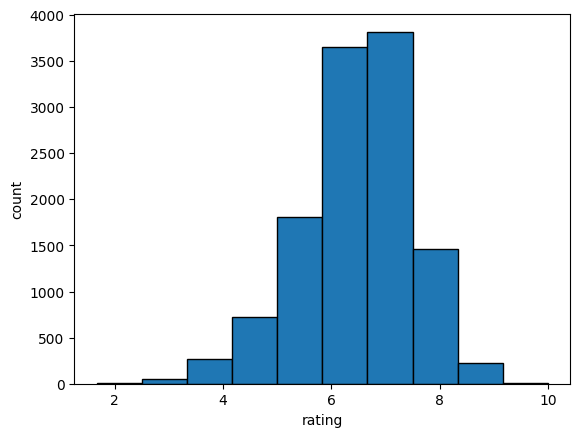

In [ ]:
anime['rating'].hist(bins = 10 ,edgecolor = 'black' ,grid = False)
plt.xlabel('rating')
plt.ylabel('count')

<Figure size 1500x600 with 0 Axes>

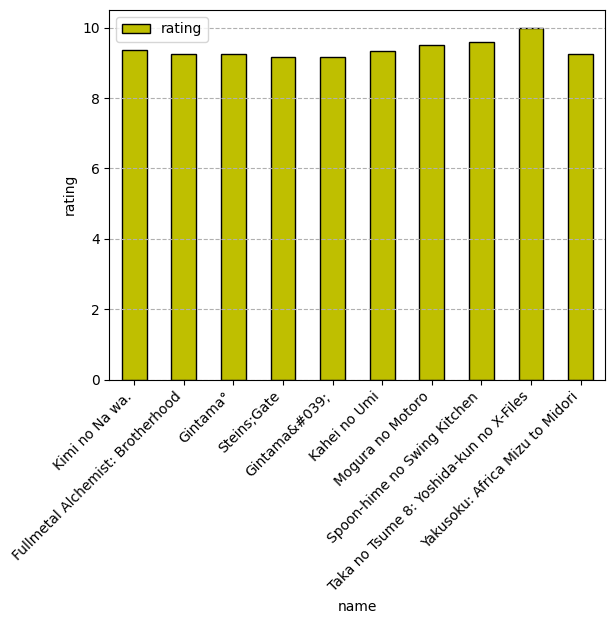

In [ ]:

plt.figure(figsize = (15,6))
rating.plot(kind = 'bar' , x = 'name' , y = 'rating' , color = 'y' ,edgecolor = 'black')
#plt.figure(figsize = (15,5))
plt.xlabel('name')
plt.ylabel('rating')
plt.xticks( rotation = 45 ,ha = 'right')
plt.grid(axis = 'y' ,linestyle = '--',alpha =1)

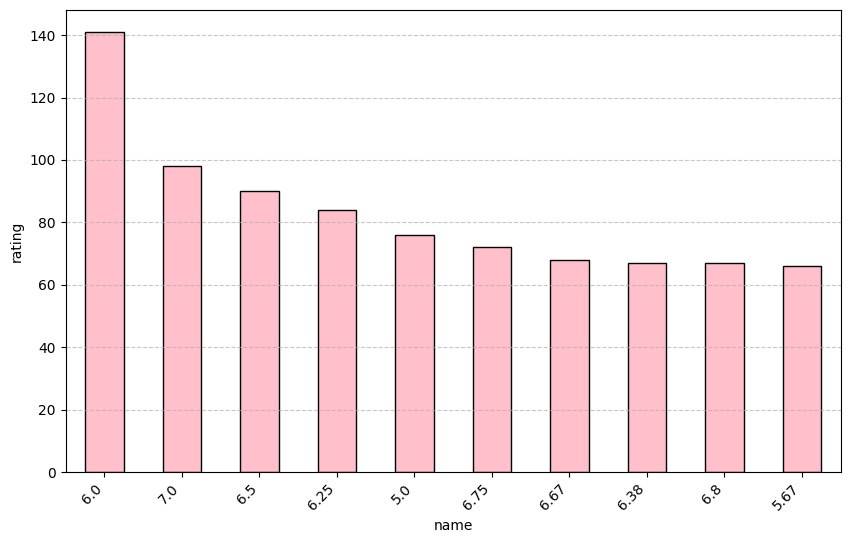

In [ ]:
top_rating = anime['rating'].value_counts().head(10)
plt.figure(figsize = (10,6))
top_rating.plot(kind = 'bar' , x = 'name' , y = 'rating' , color = 'pink' ,edgecolor = 'black')
#plt.figure(figsize = (15,5))
plt.xlabel('name')
plt.ylabel('rating')
plt.xticks( rotation = 45 ,ha = 'right')
plt.grid(axis = 'y' ,linestyle = '--',alpha = 0.7)

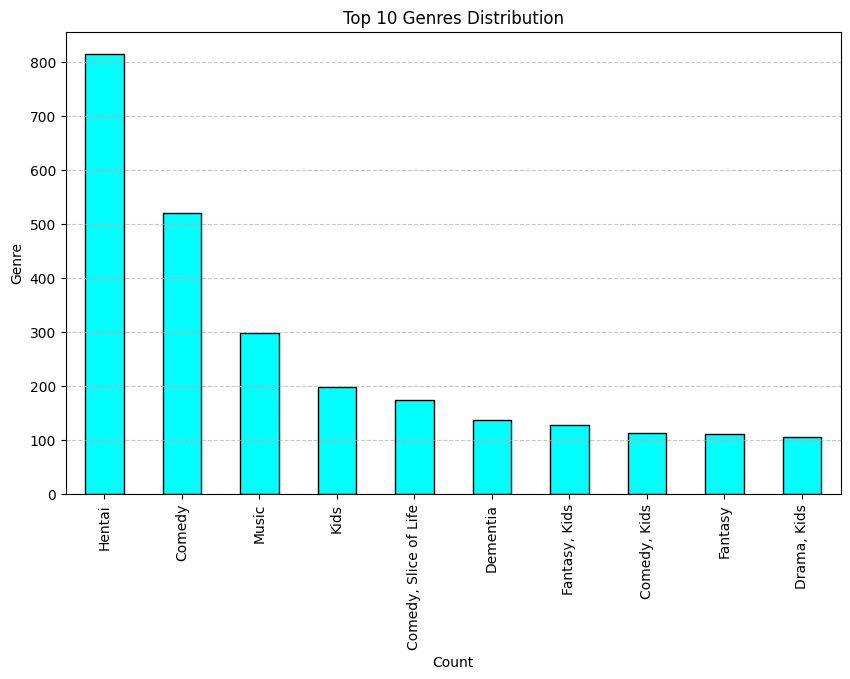

In [ ]:
top_genres = anime['genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='cyan', edgecolor='black')
plt.title('Top 10 Genres Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# feature extraction

In [ ]:
# Converting categorical features "genre" into numerical representations using One-hot encode

genres = anime['genre'].str.get_dummies(sep=', ')
df_numerical = pd.concat([anime.drop('genre', axis=1), genres], axis=1)

In [ ]:
df_numerical

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51,9.25,114262,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24,9.17,673572,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51,9.16,151266,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,OVA,1,4.15,211,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,5543,Under World,OVA,1,4.28,183,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,5621,Violence Gekiga David no Hoshi,OVA,4,4.88,219,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,OVA,1,4.98,175,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['rating', 'members']
df_numerical[numerical_cols] = scaler.fit_transform(df_numerical[numerical_cols])

df_numerical.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1,2.824474,3.292044,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,2.717032,14.002410,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51,2.707265,1.732216,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24,2.629126,11.833499,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51,2.619358,2.400518,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


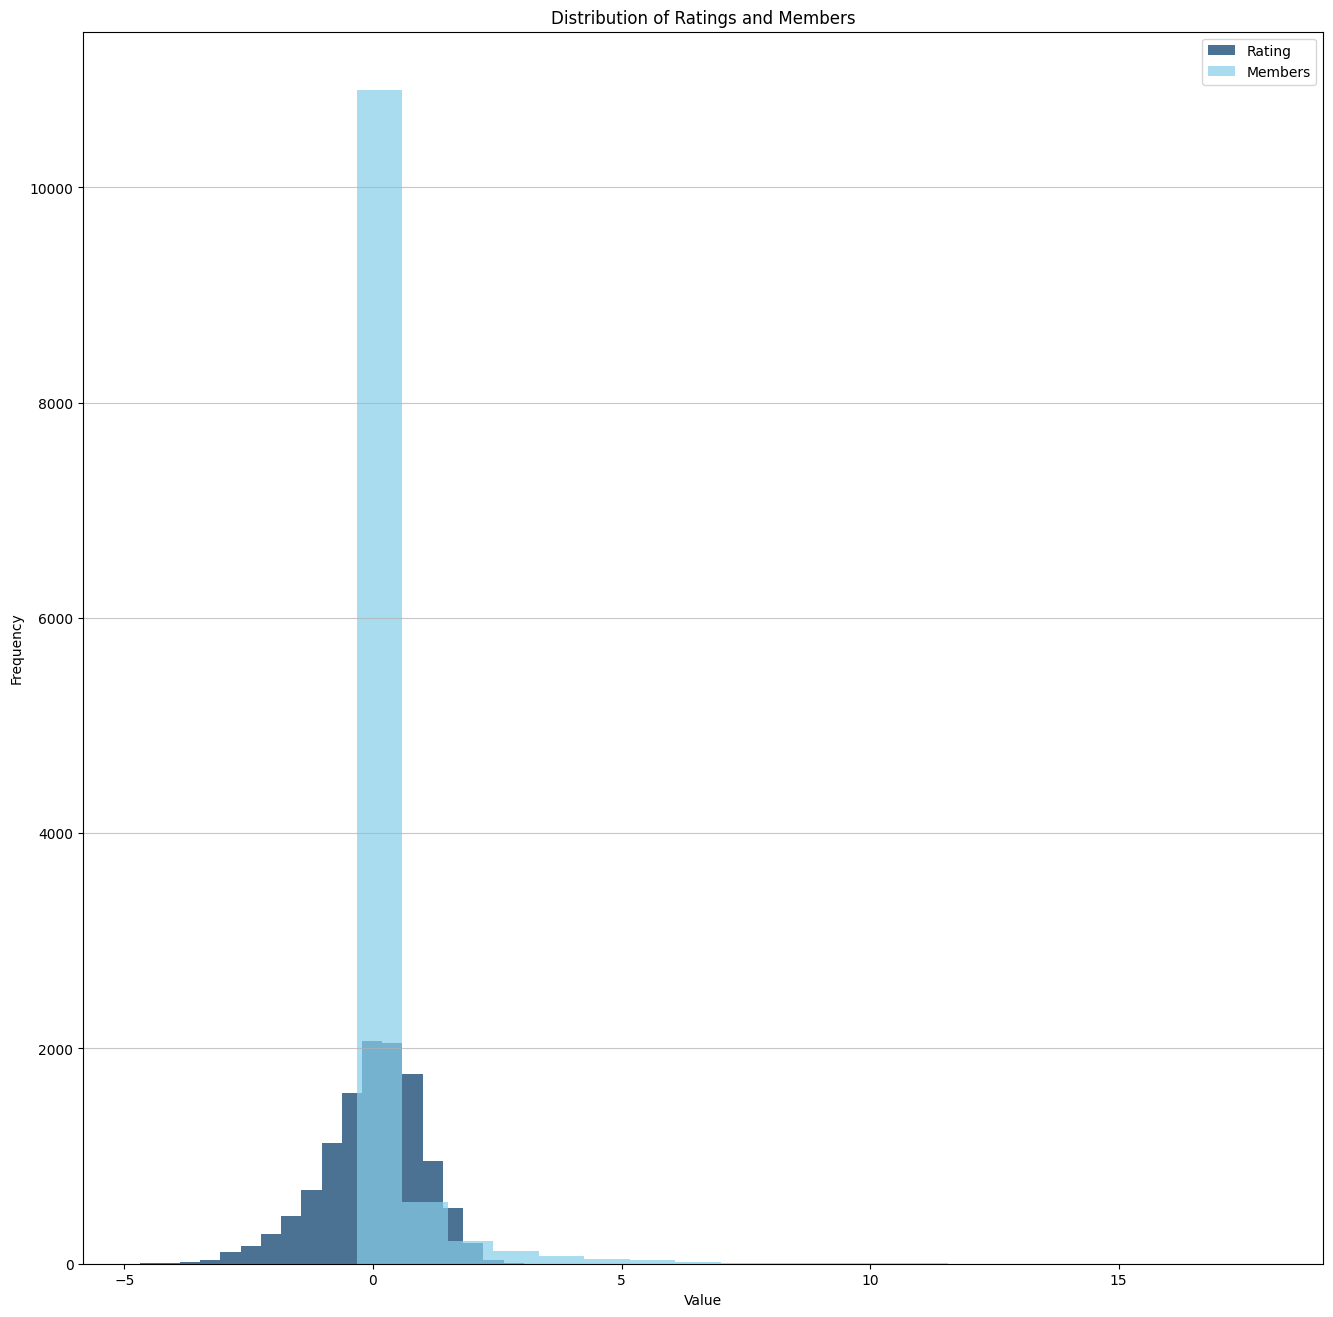

In [ ]:
plt.figure(figsize=(16, 16))

# Distribution of Ratings
plt.hist(df_numerical['rating'], bins=20, color='#003666', alpha=0.7, label='Rating')

# Distribution of Members
plt.hist(df_numerical['members'], bins=20, color='skyblue', alpha=0.7, label='Members')

plt.title('Distribution of Ratings and Members')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.7)
plt.show()

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


def recommend_similar_anime(df, target_anime, threshold=0.5):
    df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
    df = df.dropna(subset=['episodes'])

    # Extract features for similarity computation
    features = df.drop(['name', 'type'], axis=1)

    # Find the target anime's features
    target_row = features[df['name'] == target_anime]

    if target_row.empty:
        return f"Anime '{target_anime}' not found in the dataset."

    similarities = cosine_similarity(target_row, features).flatten()


    similar_indices = np.where((similarities > threshold) & (df['name'] != target_anime))[0] #get index of similar anime leaving the target anime

    recommended_anime = df.iloc[similar_indices]['name'].tolist() #return list of recommended animes

    return recommended_anime

In [ ]:
recommendations = recommend_similar_anime(df_numerical, 'Nana', threshold=0.5)
recommendations_series = pd.Series(recommendations)
top_5_recommendations = recommendations_series.value_counts().head(5)
print(top_5_recommendations)

Saru Kani Gassen           2
Shi Wan Ge Leng Xiaohua    2
Kimi no Na wa.             1
Rebirth Moon Divergence    1
Idol Fight Suchie-Pai 2    1
Name: count, dtype: int64


# evalution

In [ ]:
data = df_numerical.dropna()

In [ ]:
data['liked'] = ((df_numerical['rating'] >= 1)).astype(int)

In [ ]:
print(data['liked'].value_counts())

liked
0    10143
1     1687
Name: count, dtype: int64


In [ ]:
data

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,liked
0,32281,Kimi no Na wa.,Movie,1.0,2.824474,3.292044,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,2.717032,14.002410,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,TV,51.0,2.707265,1.732216,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,TV,24.0,2.629126,11.833499,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,9969,Gintama&#039;,TV,51.0,2.619358,2.400518,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,OVA,1.0,-2.274108,-0.327575,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,5543,Under World,OVA,1.0,-2.147132,-0.328080,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,5621,Violence Gekiga David no Hoshi,OVA,4.0,-1.561088,-0.327430,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,OVA,1.0,-1.463414,-0.328225,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# spilitting data into training and testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = data.drop(['name', 'type','anime_id'], axis=1)
y = data['liked']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9464, 47)
Shape of X_test: (2366, 47)
Shape of y_train: (9464,)
Shape of y_test: (2366,)


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:',accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


# Interview questions

# 1.Can you explain the difference between user-based and item-based collaborative filtering?


The difference between user-based and item-based collaborative filtering are in user-based collaborative filtering, the goal is to recommend items to a user based on what similar users have liked or interacted with but in item-based collaborative filtering, the focus is on the similarity between items rather than users. The idea is to recommend items that are similar to items the user has already interacted with.

# 2.What is collaborative filtering, and how does it work?